In [1]:
# importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Uploading the dataset to a cloud drive for easy accessing
url='https://drive.google.com/file/d/1HGbQtdf9vcmmPRAonnRAfMgA2lZVsFn-/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset = pd.read_csv(url)
print(dataset)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [3]:
# getting the legth of the dataset
len(dataset)

1338

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
# getting the rows and column count
dataset.shape

(1338, 7)

In [7]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


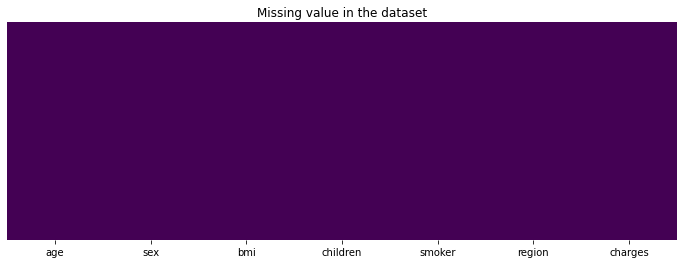

In [8]:
# checking if there are missing values in dataset
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

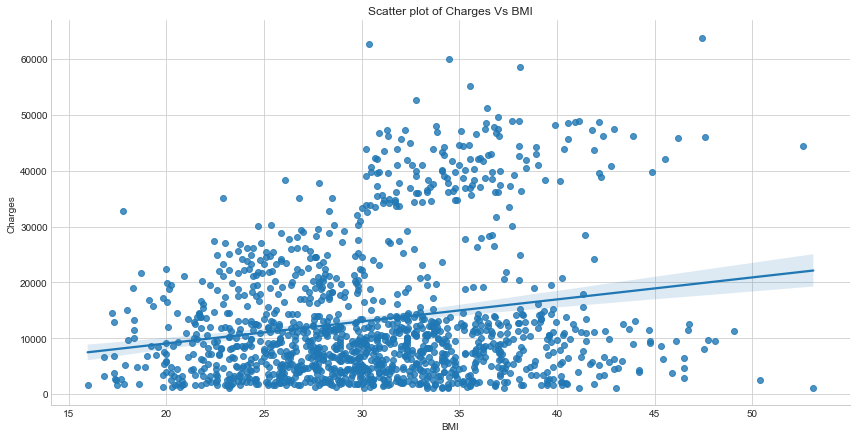

In [9]:
# finding the correlation of hospital charges with BMI
# plt.scatter(dataset['bmi'], dataset['charges'], alpha=0.5)
plt.style.use('seaborn-whitegrid')
sns.lmplot(x='bmi',y='charges',data=dataset,aspect=2,height=6)
plt.title('Scatter plot of Charges Vs BMI')
plt.xlabel("BMI")
plt.ylabel("Charges")

plt.show()

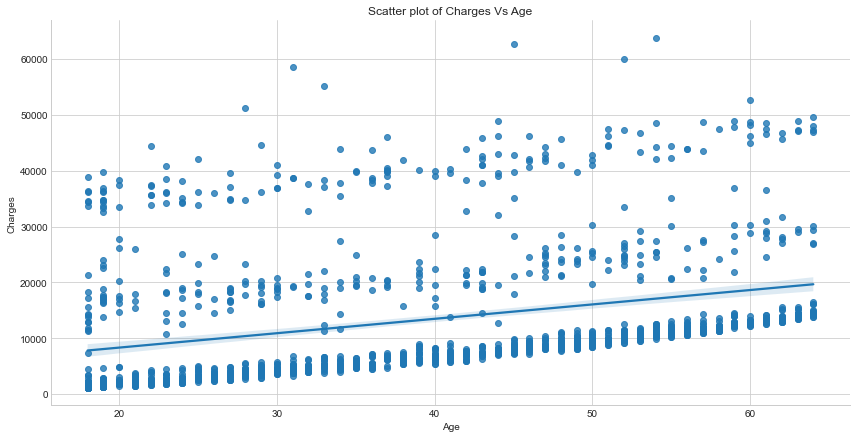

In [10]:
# finding the correlation of hospital charges with Age
# plt.scatter(dataset['age'], dataset['charges'], alpha=0.5)
plt.style.use('seaborn-whitegrid')
sns.lmplot(x='age',y='charges',data=dataset,aspect=2,height=6)
plt.title('Scatter plot of Charges Vs Age')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

Text(0, 0.5, 'charges')

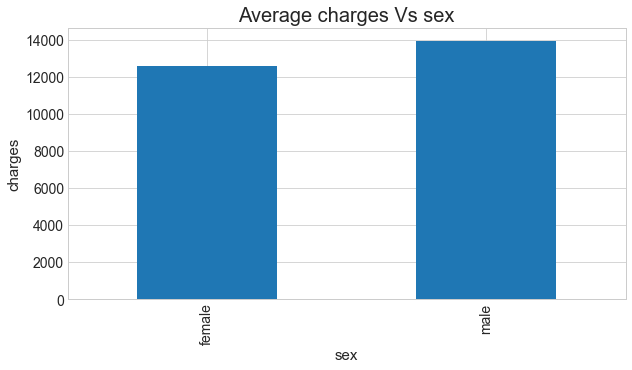

In [11]:
ax = dataset.groupby(['sex'])['charges'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)
ax.set_title("Average charges Vs sex", fontsize = 20)

ax.set_xlabel("sex", fontsize = 15)
ax.set_ylabel("charges", fontsize = 15)

In [12]:
dataset.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0, 0.5, 'charges')

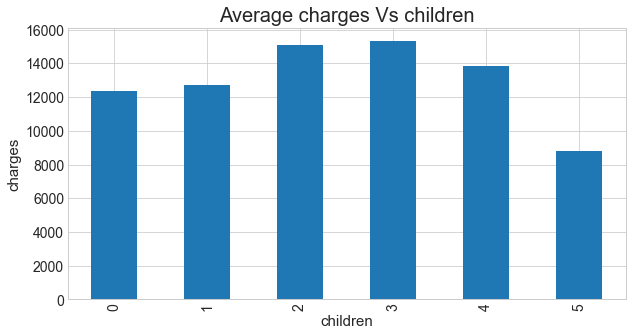

In [13]:
ax = dataset.groupby(['children'])['charges'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)
ax.set_title("Average charges Vs children", fontsize = 20)

ax.set_xlabel("children", fontsize = 15)
ax.set_ylabel("charges", fontsize = 15)

Text(0, 0.5, 'charges')

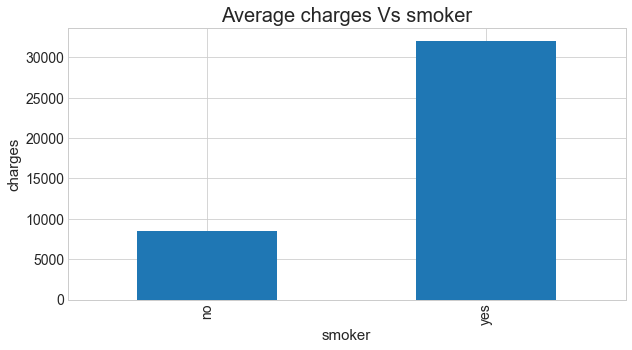

In [14]:
ax = dataset.groupby(['smoker'])['charges'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)
ax.set_title("Average charges Vs smoker", fontsize = 20)

ax.set_xlabel("smoker", fontsize = 15)
ax.set_ylabel("charges", fontsize = 15)

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

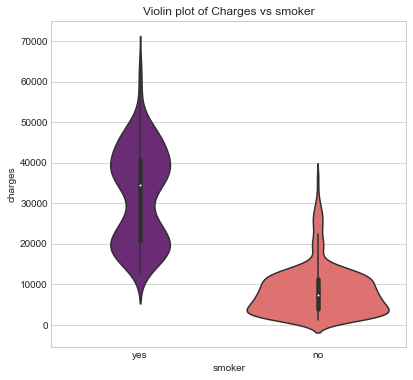

In [15]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=dataset,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker')

Text(0, 0.5, 'charges')

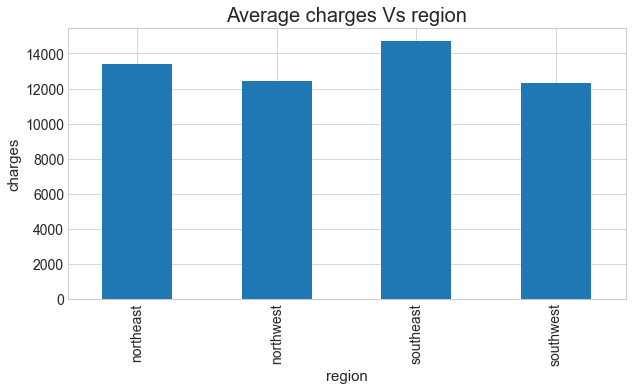

In [16]:
ax = dataset.groupby(['region'])['charges'].mean().plot.bar(
    figsize = (10,5),
    fontsize = 14
)
ax.set_title("Average charges Vs region", fontsize = 20)

ax.set_xlabel("region", fontsize = 15)
ax.set_ylabel("charges", fontsize = 15)

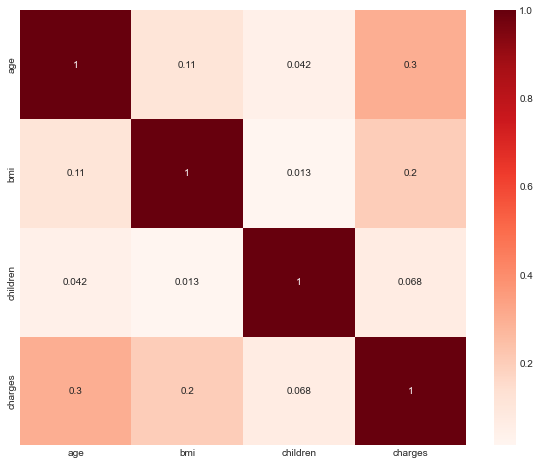

In [17]:
# checking for correlation
plt.figure(figsize=(10,8))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
corr_charges=cor['charges'].sort_values(ascending=False)
print(corr_charges)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64
